In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

这一部分将使用多变量线性回归预测房屋价格。
文件ex1data2.txt包含俄勒冈州波特兰市的房价训练集。第一列是房子的大小(单位是平方英尺)，第二列是卧室的数量，第三列是房子的价格。

3.1 特征标准化
观察数据集的数值会发现房屋大小大约是卧室数量的1000倍。当特征值差别比较大的时候，进行特征缩放可以使梯度下降收敛得更快。
因此你需要做的是：1.从数据集中减去每个特征的平均值。2.在减去平均值后，再用特征值除以它们各自的“标准差”

In [29]:
data = pd.read_csv('data/ex1data2.txt', names= ['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [30]:
def standarize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

3.2 梯度下降 
确保你的代码支持任意数量的特征，并且支持向量化。

In [31]:
X = data.loc[:, ['Size', 'Bedrooms']]
y = data.loc[:, ['Price']]
X = standarize(X)
X = np.hstack([np.ones((X.shape[0], 1)), X])
X[:10]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337]])

In [20]:
y.head()

,Price
0,399900
1,329900
2,369000
3,232000
4,539900


In [21]:
def loss_function(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [22]:
def gradientDescent(X, y, theta, learning_rate, iterations):
    temp = np.matrix(np.zeros(theta.shape))
    history_cost = np.zeros(iterations)
    parameters = int(theta.ravel().shape[1])  #参数个数
    
    for i in range(iterations):
        error = (X * theta.T) - y
        for j in range(parameters):    
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (learning_rate / len(X)) * np.sum(term)
        theta = temp
        history_cost[i] = loss_function(X, y, theta)
    return theta, history_cost

In [23]:
learning_rate = 0.01
iterations = 1500

In [24]:
X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))
g, history_cost = gradientDescent(X, y, theta, learning_rate, iterations)
loss_function(X, y , g)

2043280050.6028292

In [25]:
predict = [1, 1650, 3] * g.T
predict

matrix([[1.80909542e+08]])

In [26]:
g

matrix([[340412.65957447, 109447.79646964,  -6578.35485416]])

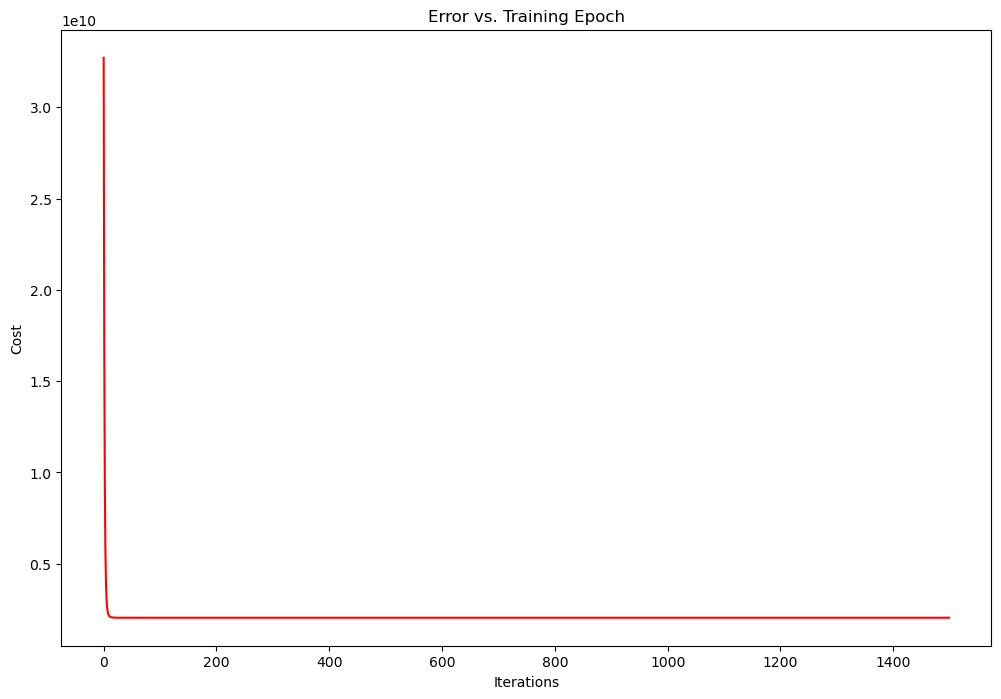

In [27]:
fig, ax = plt.subplots(figsize= (12,8))
ax.plot(np.arange(iterations), history_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

使用正规方程$\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$进行模型学习，不需要特征缩放，但仍需要在X矩阵中添加值为1的列作为截距项。

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('data/ex1data2.txt', names = ['Size', 'Bedrooms', 'Price'])
data.insert(0, 'ones', 1)
X = data.loc[:, ['ones', 'Size', 'Bedrooms']]
y = data.loc[:, ['Price']]
X = np.matrix(X.values)
y = np.matrix(y.values)

In [40]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

`np.linalg.inv()`对矩阵进行求逆

In [41]:
theta2 = normalEqn(X, y)
theta2

matrix([[89597.9095428 ],
        [  139.21067402],
        [-8738.01911233]])

In [42]:
predict = [1, 1650, 3] * theta2
predict

matrix([[293081.46433489]])